<a href="https://colab.research.google.com/github/Nikhil90398/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

![](https://3aij0xs1tvo2l5now3runyvz-wpengine.netdna-ssl.com/wp-content/uploads/2021/12/seoul_bike_ttareungyi_seoul_korea.jpg)

## <b> Problem Description </b>

 Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it reduces waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes using the values in the other columns. If we can do so with the of historical datas, then we should able to estimate bike count required at each hour.

--------

## <b> Data Description </b>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), The number of bikes rented per hour and date information.


### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Func(Functional hours)

----

> All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

----

## **Import Libraries and Data** 


In [234]:
# Import necessary libraries

import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table

import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectFromModel

from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm 

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [195]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
# Read the csv file
data=pd.read_csv("/content/drive/MyDrive/capstone/Capstone_2/SeoulBikeData.csv",encoding= 'unicode_escape')

## **First Look**

In [197]:
# Fisrt 5 values.
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [198]:
# Last 5 values.
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


>Let's check the duplicate entries

In [199]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 0


In [200]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [201]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

>Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.


> Looks like "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data. None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [202]:
# Statistical info.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


And the ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

In [203]:
# Filter the Functioning Day
data=data[data["Functioning Day"] == "Yes"]

# Step 1 - Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.

### Seperate Date, Month, Year from Date Column

In [204]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day']=data['Date'].dt.day              # compute day
data['Month']=data['Date'].dt.month          # compute month
data['Year']=data['Date'].dt.year            # compute year
data.drop(columns=["Date"],inplace=True)

#### Numerical Data

In [205]:
# list of numerical variables
numerical_features=[col for col in data.columns if data[col].dtype!='O']
# Separate dataframe for Numerical feature
num_data=data[numerical_features]
num_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,1,2017


#### Categorical Data

In [206]:
# list of categorical variables
categorical_features=[col for col in data.columns if data[col].dtype=='O']
# Separate dataframe for Categorical feature
cat_data=data[categorical_features]
cat_data.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


####Discrete Variables

Discrete Variables Count: 4


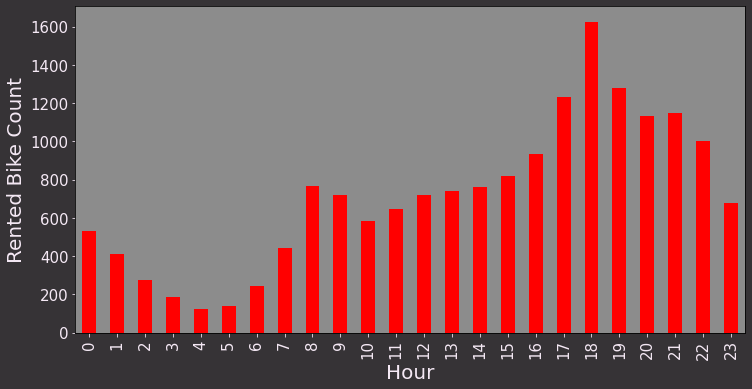

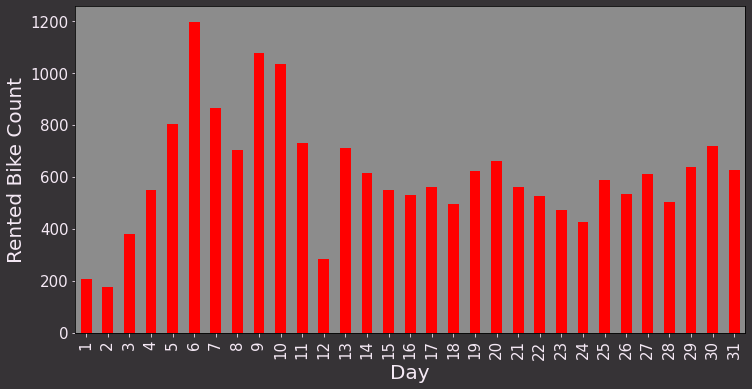

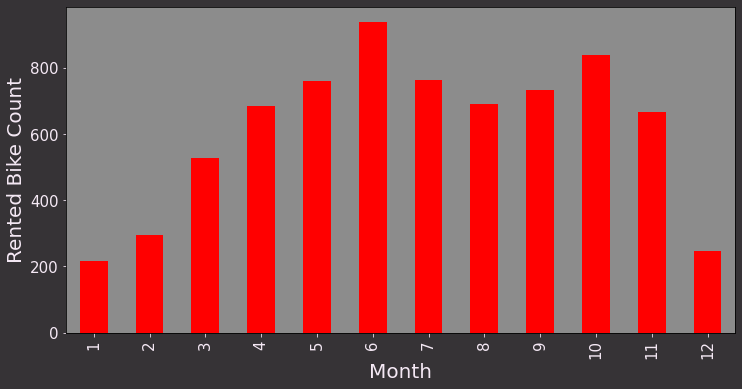

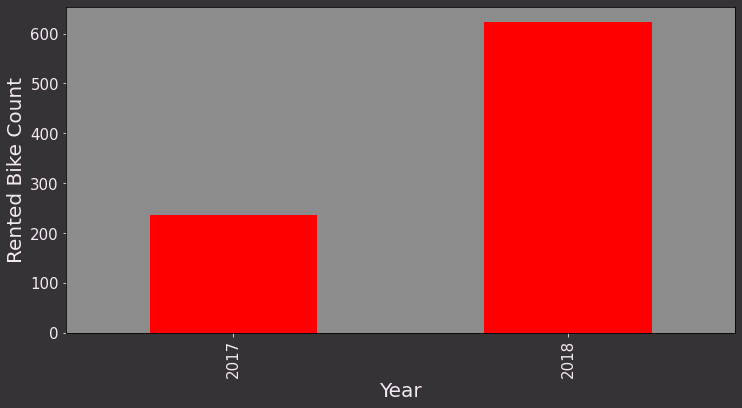

In [207]:
## Lets analyse the discrete values by creating histograms to understand the distribution
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

for feature in discrete_feature:
    dataset=data.copy()
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar(color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Rented Bike Count",  color='#F5E9F5', fontsize=20)       

* June is the most preferred Month for bike sharing

* July and May are the second best 

* Bike sharing was least in December and January

####Continuous Variables

Continuous feature Count 9


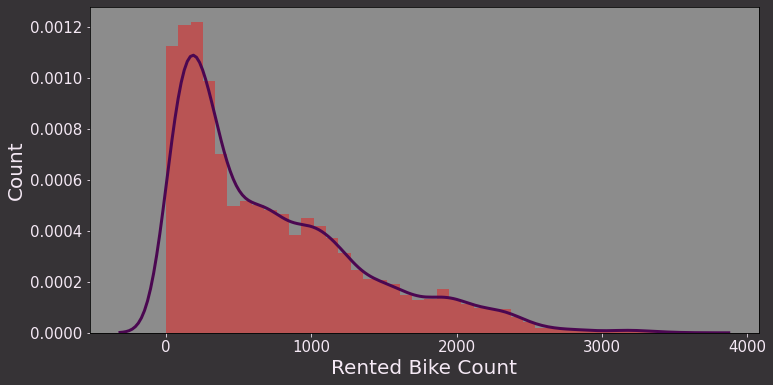

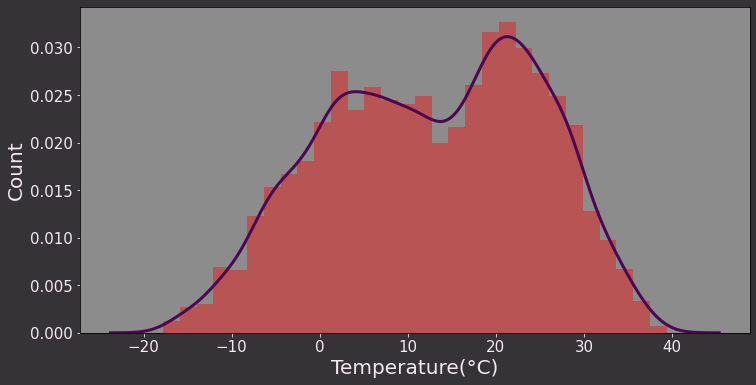

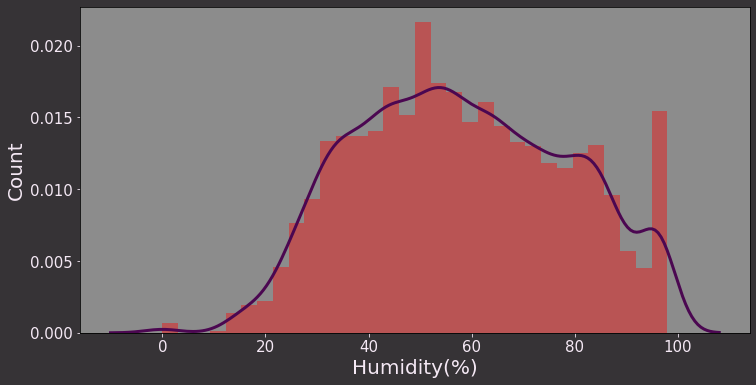

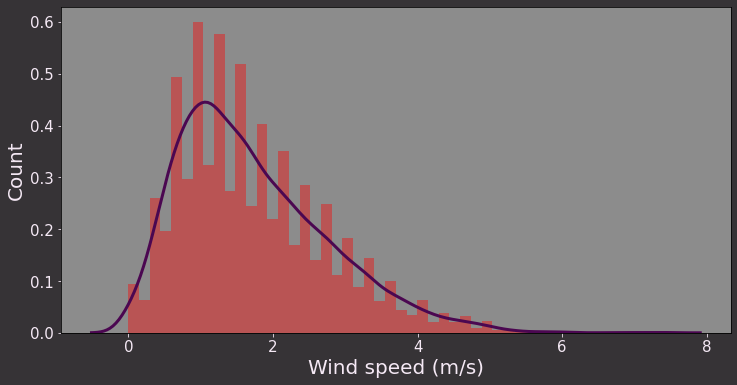

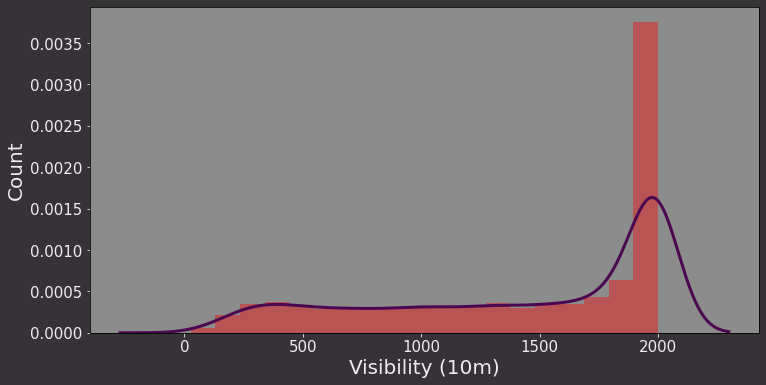

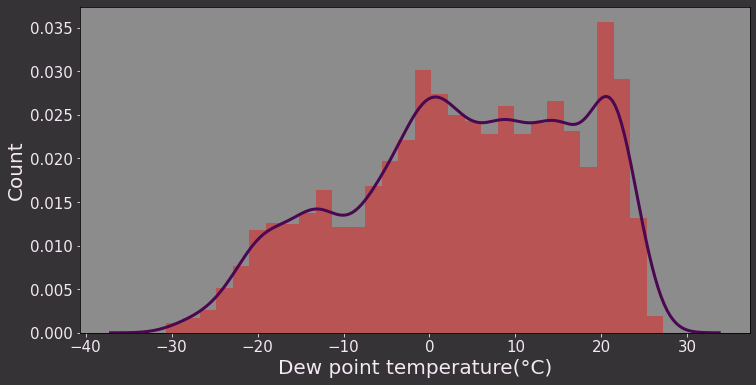

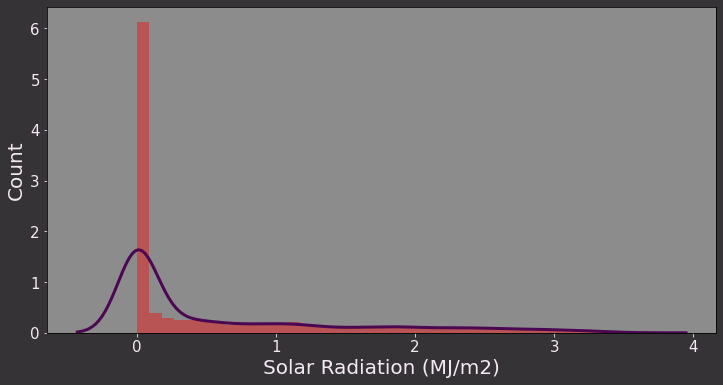

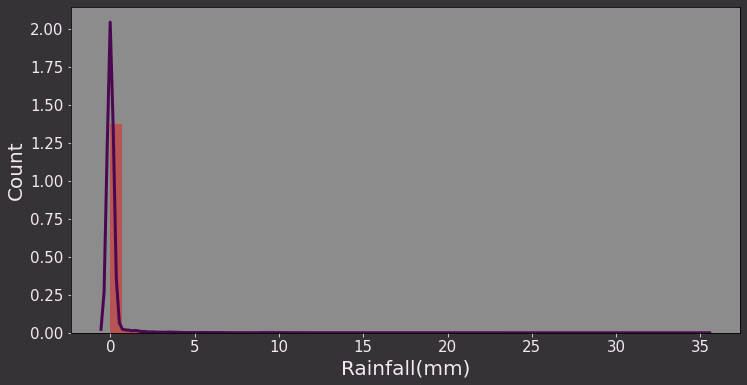

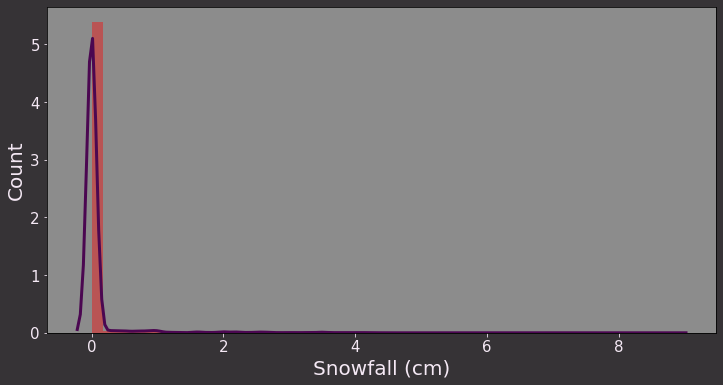

In [208]:
## Lets analyse the continuous values by creating histograms to understand the distribution
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

for feature in continuous_feature:
    dataset=data.copy()
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.distplot(dataset[feature],color='r',kde_kws={'linewidth':3,'color':'#4B0751'});
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Count",  color='#F5E9F5', fontsize=20)
   

* Bike sharing is at its peak between 4pm- 6pm

* Bike shaing is least between 4am-6am.

* Most preferred temperature for bike renting is 20-30 Degree Celcius.

* Bike sharing is least when temperatur is < 5 and >35 Degree Celcius.

* Humidity of 40%-60% is most favourable for bike sharing.

* Wind speed of 1m/s -2 m/s is most favourable for bike sharing.

* Bike sharing count is directly related to Visbility in the area.

* Dew Point Temperature of 5-25 Degree Celcius is most favourable for bike sharing.

* Optimum Solar Radiation, no rainfall and no snowfall leads to higher bike renting in Seoul.

#### **Checking the skewness of our dependent variable.**

Text(0, 0.5, 'Density')

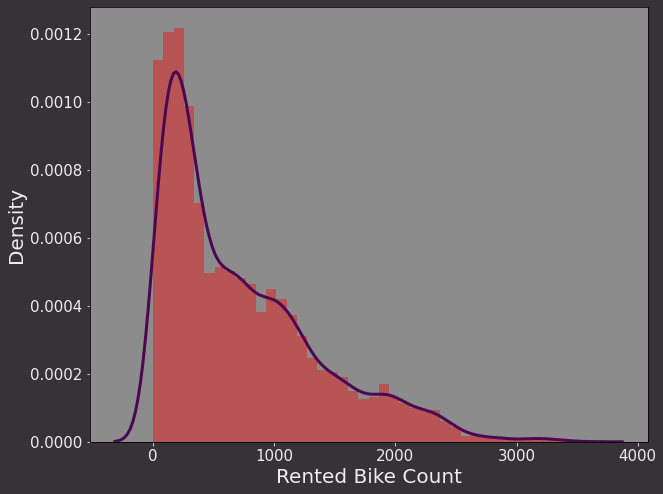

In [209]:
fig, ax = plt.subplots(figsize=(10,8),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.distplot(data['Rented Bike Count'],color='r',kde_kws={'linewidth':3,'color':'#4B0751'});
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Rented Bike Count", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Density",  color='#F5E9F5', fontsize=20)

As we can see clearly our dependent varibale is right skewed so we need to apply some transformations here.


Text(0.5, 1.0, 'square')

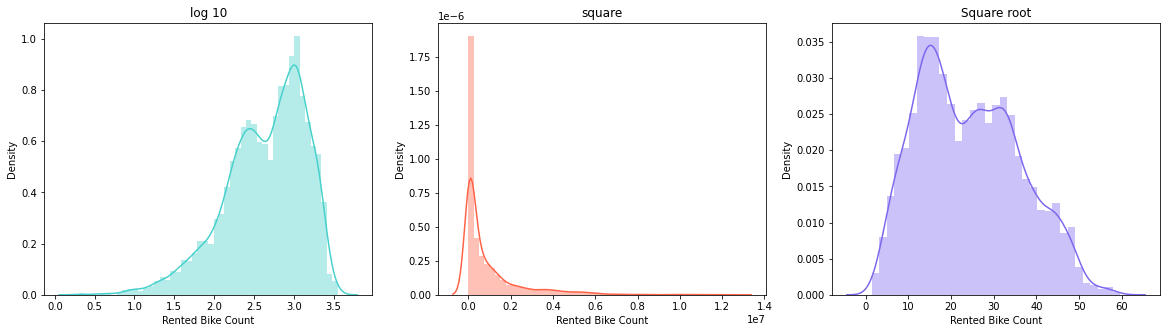

In [210]:
# Checking some tranformations on Dependent variable'Rented Bike Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))

sns.distplot(np.sqrt(data['Rented Bike Count']),ax=axes[2], color='mediumslateblue').set_title("Square root")  #applying Square root transformation
sns.distplot(np.log10(data['Rented Bike Count']+0.0000001),ax=axes[0],color='mediumturquoise').set_title("log 10") #applying log transformation
sns.distplot((data['Rented Bike Count']**2),ax=axes[1],color='tomato').set_title("square") #applying Square transformation

As we can see our dependent variable is right skewed. So we will try some transformations to normalize it.

We observed that 'Square Root' tranformation is normalizing the dependent variable so we will use this transformation while we train our model.

## Categorical Variables

In [211]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 1


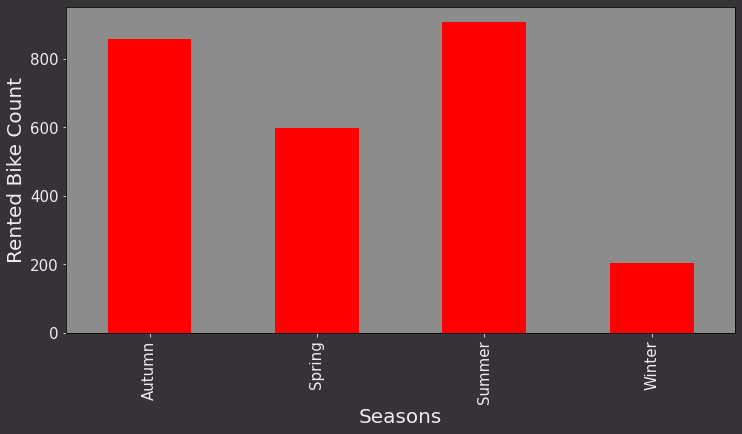

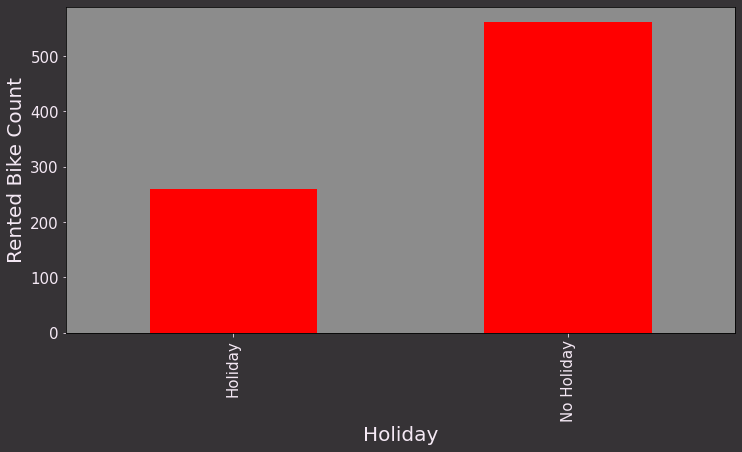

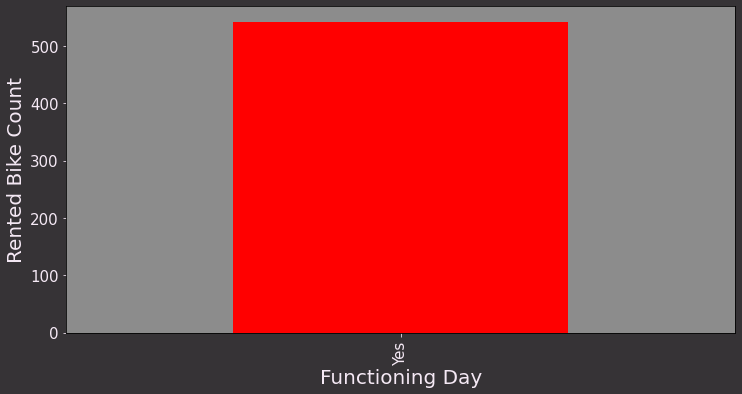

In [212]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count
for feature in categorical_features:
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar(color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Rented Bike Count",  color='#F5E9F5', fontsize=20)
  

* Most number of Bikes are rented in Summer, followed by Autumn and Spring and Winter

* People prefer booking bikes on Working days more than the Holidays

* All the bikes were rented on the functioning day

## Outliers

“Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.” Outliers are extreme values that deviates from the other observations in the dataset.

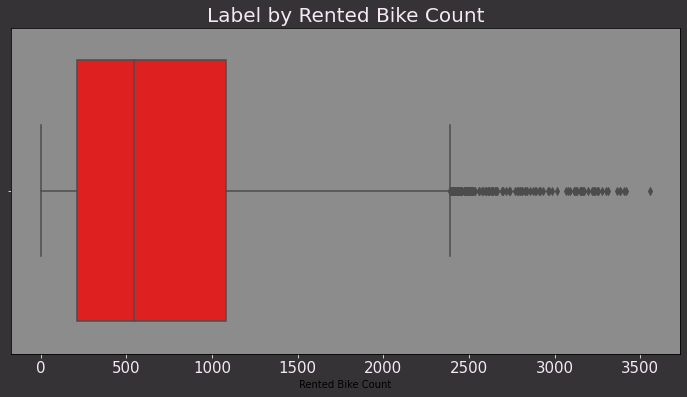

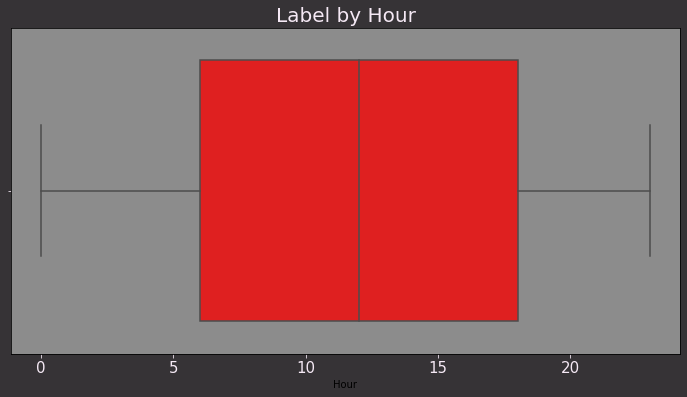

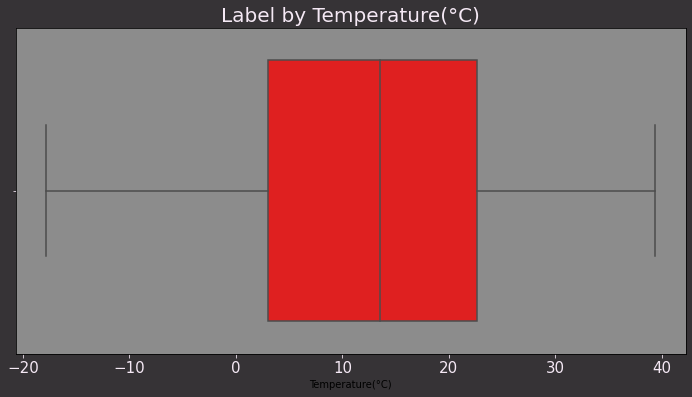

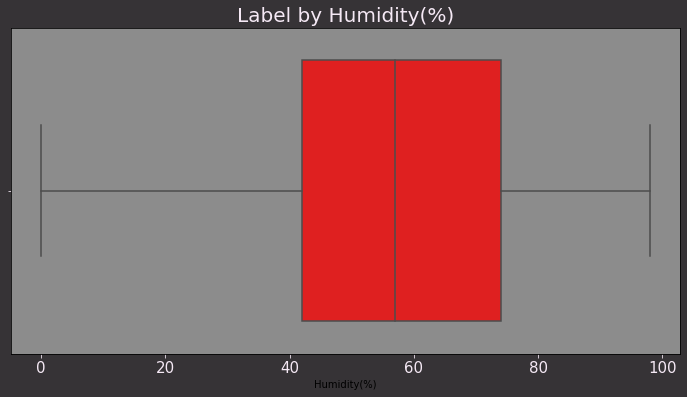

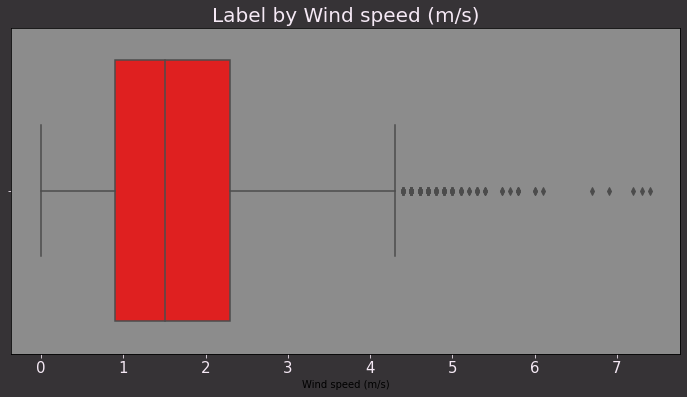

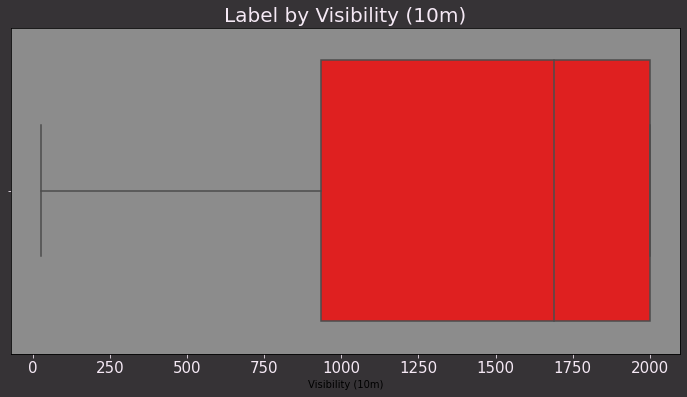

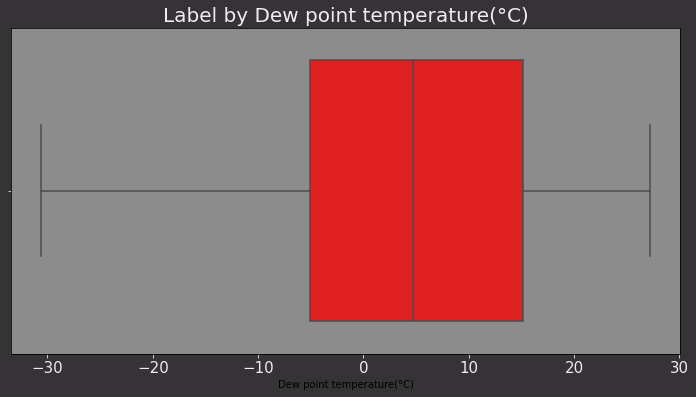

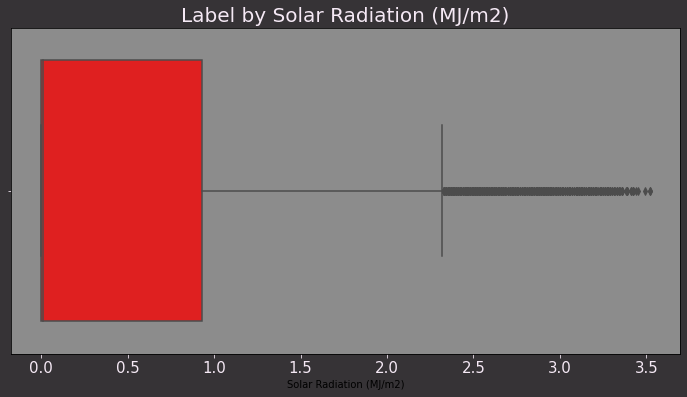

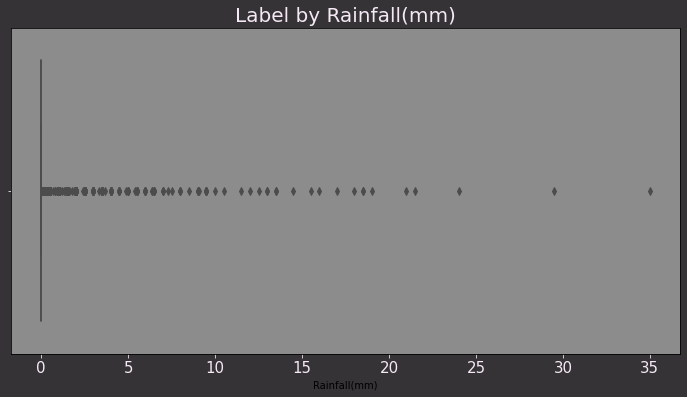

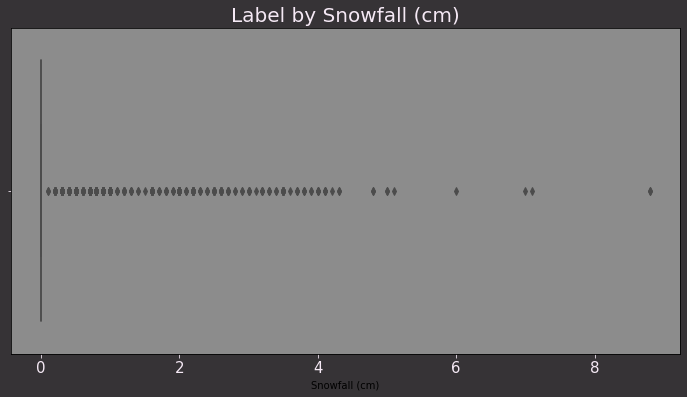

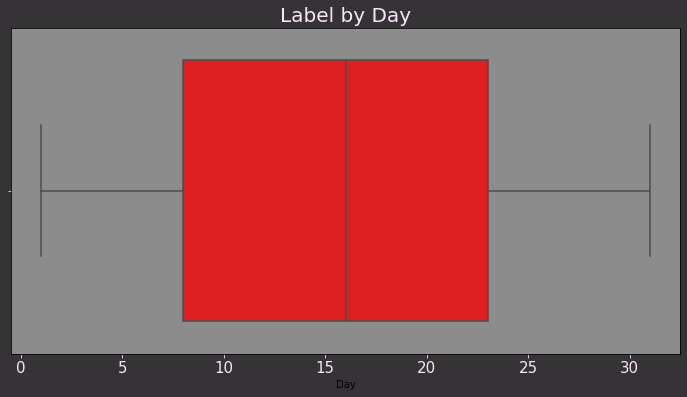

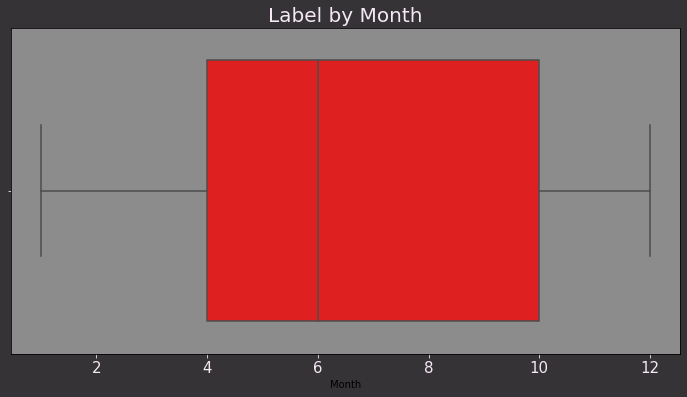

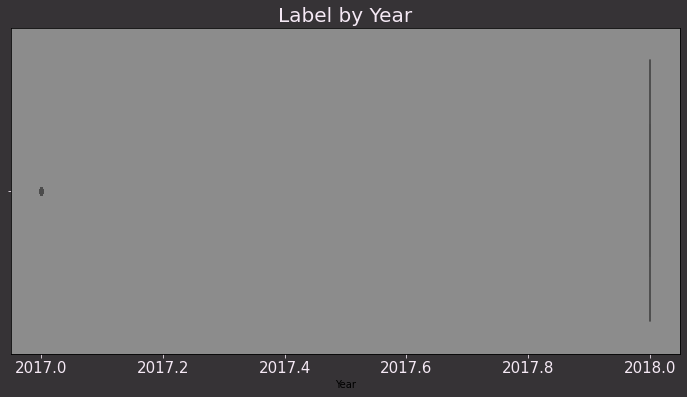

In [213]:
for col in dataset.describe().columns:
    
    fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.boxplot(dataset[col],color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_title('Label by ' + col,color='#F5E9F5', fontsize=20)
    
plt.show()

After plotting the boxplot for the outliers in our dataset, we observed that there are outliers present in "Rented Bike Count" as that is our target variable.

## Linear Relation

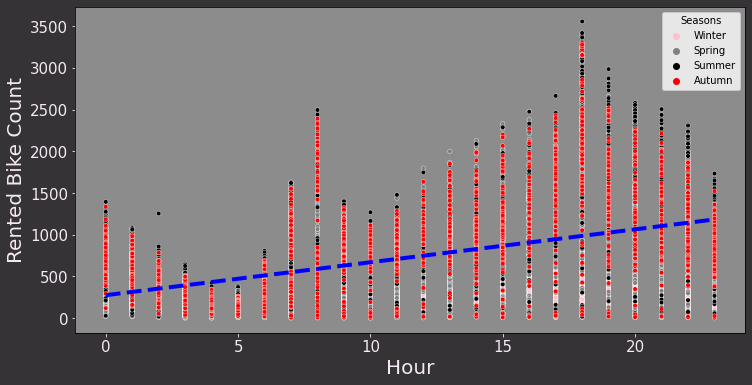

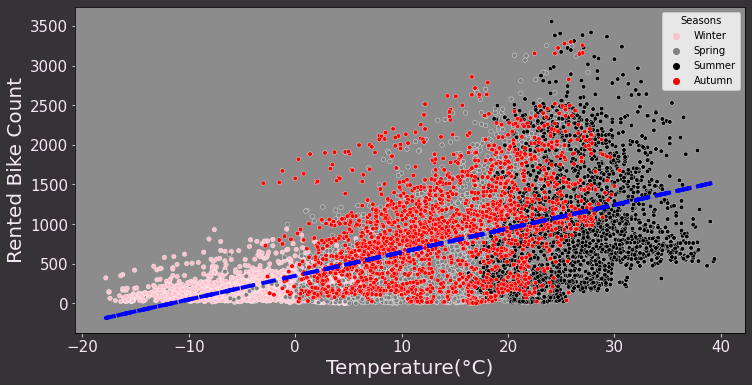

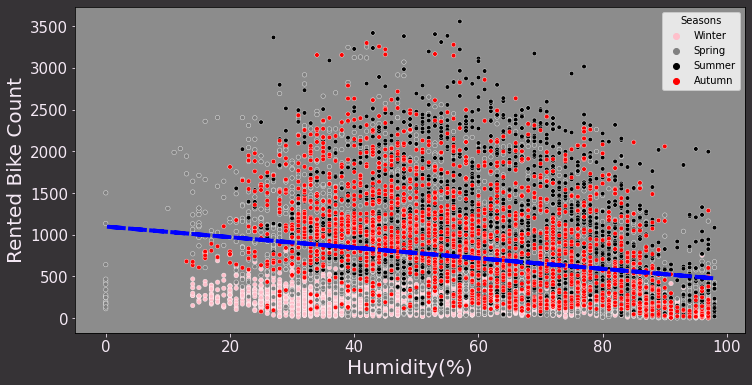

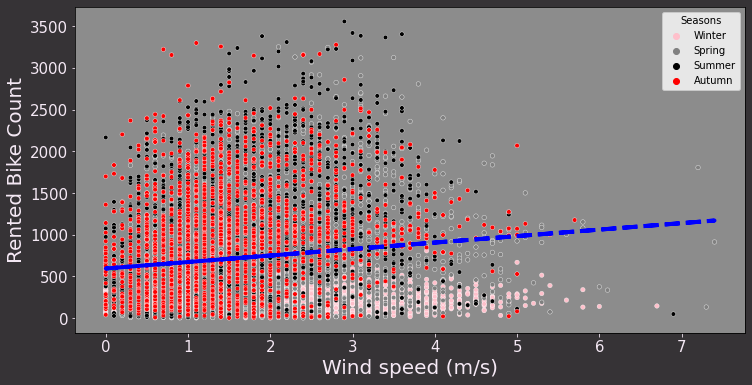

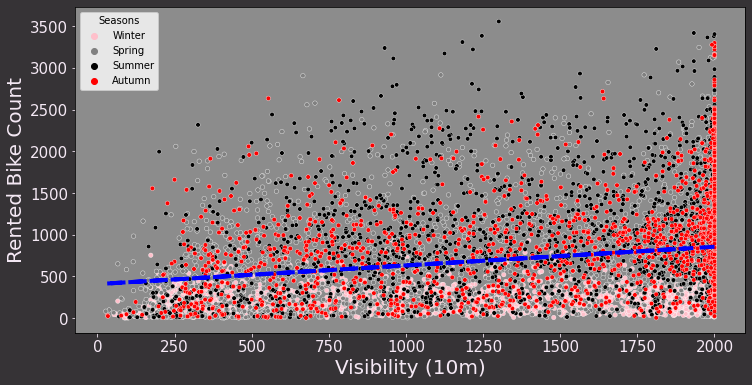

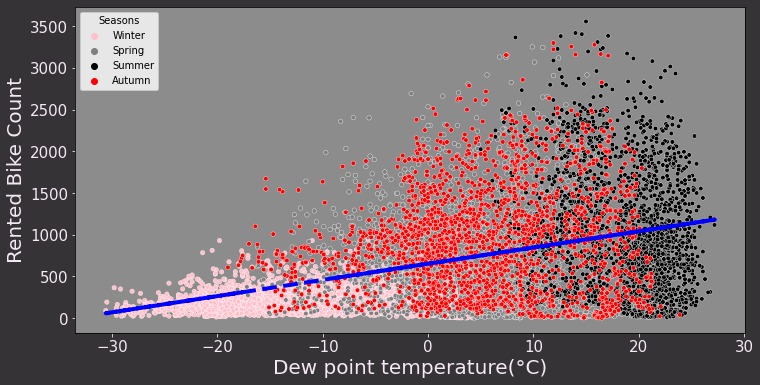

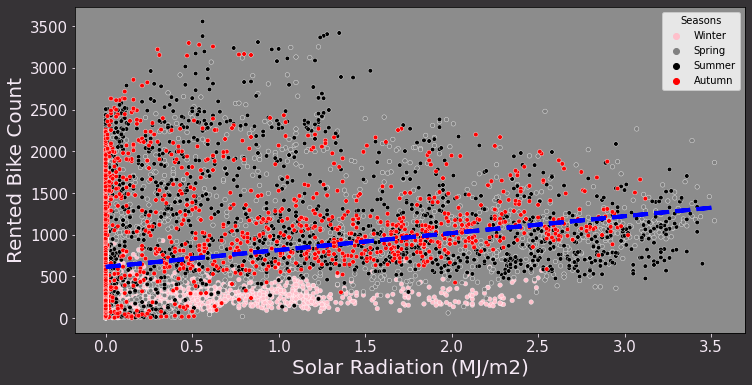

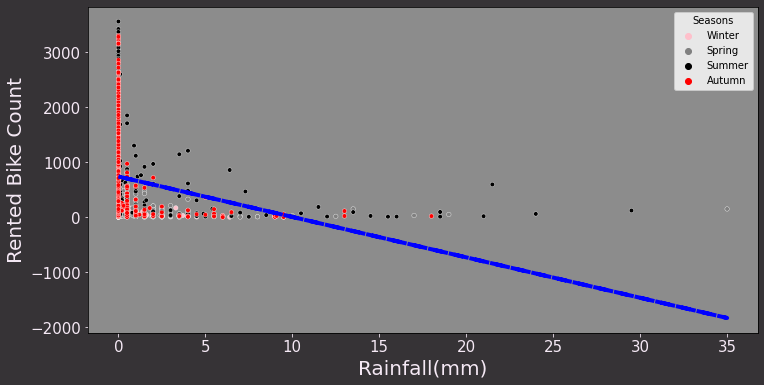

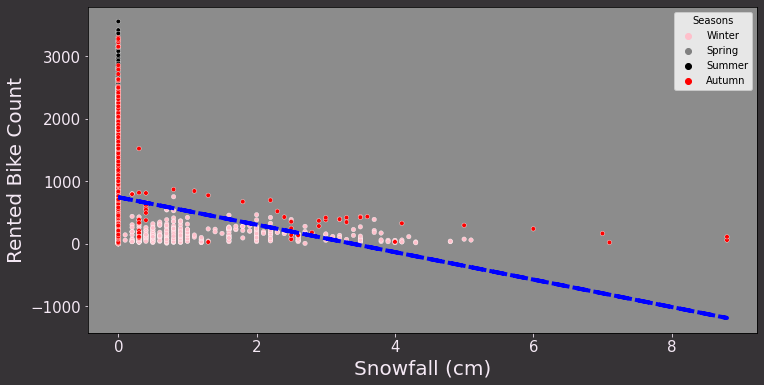

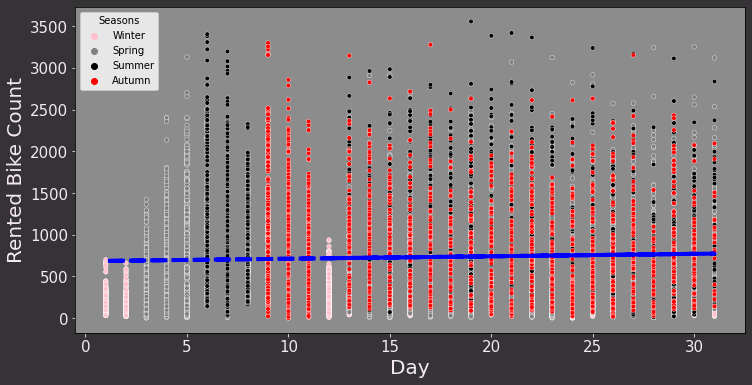

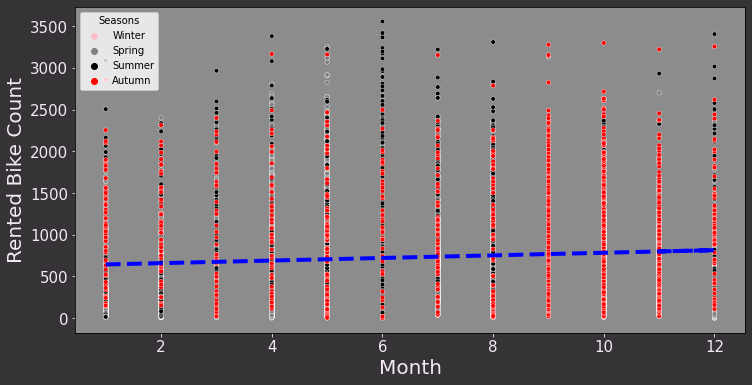

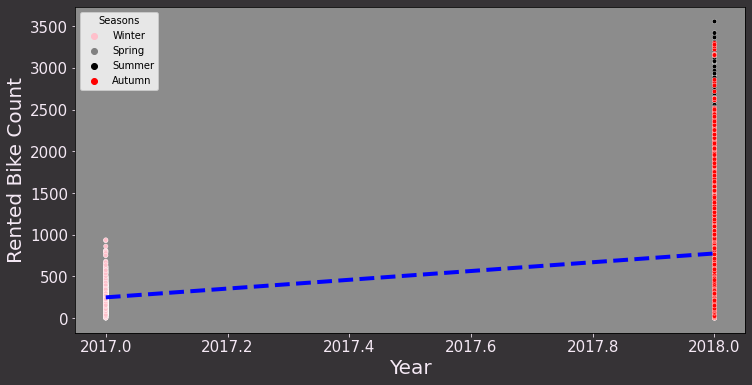

In [214]:
# Creating scatterplot to determine the co-relation
for col in (numerical_features[1:]):
  fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
  ax.patch.set_facecolor('#8C8C8C')
  
  sns.scatterplot(data = data, x = col ,  y = 'Rented Bike Count' ,hue = 'Seasons',s=20,palette=["pink","grey","black","red"], ax =ax)  #... using Season as hue to see the distribution of count

  z = np.polyfit(data[col], data['Rented Bike Count'], 1)  # creating best fit line
  y_hat = np.poly1d(z)(data[col])
  plt.plot(data[col], y_hat, "b--", lw=4)
  
  ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
  ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
  ax.set_xlabel(col, color='#F5E9F5', fontsize=20)
  ax.set_ylabel("Rented Bike Count",  color='#F5E9F5', fontsize=20)

* Bike sharing count is positively co- related to Hour as the Hours Progress from 0 (12 am) to 20 (8pm) the bike sharing count increases.
* Bike sharing is positively co-related to tempearature as the temperature approaches 30*C.
* Though one thing to notice the positive co-relation is applicable only because temp is Seoul rarely crosses 40 Degress

* Humidity, Snowfall, Rainfall, are negatively co-related to Bike rent count.

* Solar radiation and Dew Point temperatuer are slightly positively realted to Bike sharing count.

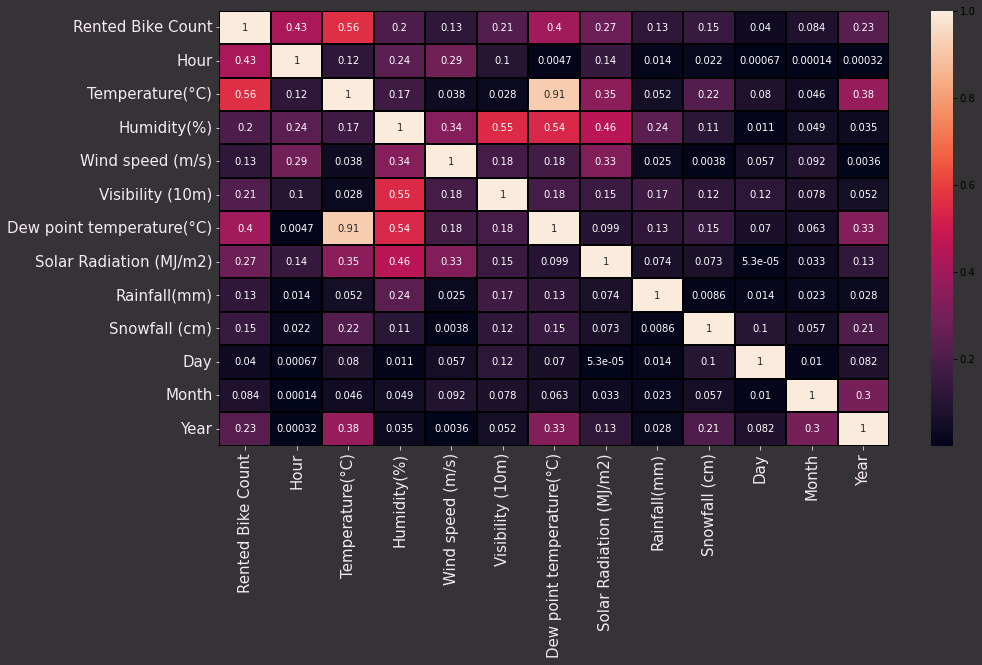

In [215]:
# Checking multicollinearity after defining the new column and removing the previous ones from our dataframe.
# Creating Heatmap to determine the co-relation
fig, ax = plt.subplots(figsize=(15,8),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.heatmap(abs(data.corr()),annot=True,linewidth=1,linecolor="black")
ax.tick_params( colors='#F5E9F5',labelsize=15) 
ax.tick_params( colors='#F5E9F5',labelsize=15)

## VIF Calculation

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.

Here, we have performed the VIF calculations for the clarity about the correlation between the features. after that, we have dropped the features which were highly correlated with any other independent features for accurate predictions.

In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Making function for VIF calculation.

def cal_VIF(F):
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [217]:
#Checking the VIF score of all the independent variables.
cal_VIF(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.450425
1,Temperature(°C),185.510084
2,Humidity(%),182.909204
3,Wind speed (m/s),4.866596
4,Visibility (10m),10.737733
5,Dew point temperature(°C),126.862428
6,Solar Radiation (MJ/m2),2.890387
7,Rainfall(mm),1.104193
8,Snowfall (cm),1.154571
9,Day,4.440890


As we can see that the Year is highly correlated, we will drop it and then check the correlation again.

In [218]:
#Checking the correlation of independent variables without the Year column.
cal_VIF(dataset[[i for i in dataset.describe().columns if i not in ['Year','Rented Bike Count']]])

,variables,VIF
0,Hour,4.422358
1,Temperature(°C),38.074470
2,Humidity(%),8.316952
3,Wind speed (m/s),4.854140
4,Visibility (10m),9.441303
5,Dew point temperature(°C),20.030365
6,Solar Radiation (MJ/m2),2.884888
7,Rainfall(mm),1.084099
8,Snowfall (cm),1.143203
9,Day,4.362654


After removing Year, we have observed that there is still a really concerning correlation score on Temperature and Dew point Temperature, since Temperature is an important feature as it is significant for the Seasons Column, We will remove Dew point temperature and check the VIF of remaining variables.

In [219]:
#Checking VIF score of independent variables without Year, Dew point temperature.
cal_VIF(dataset[[i for i in dataset.describe().columns if i not in ['Year','Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,4.019820
1,Temperature(°C),3.168105
2,Humidity(%),6.733950
3,Wind speed (m/s),4.639585
4,Visibility (10m),5.455767
5,Solar Radiation (MJ/m2),2.269320
6,Rainfall(mm),1.082799
7,Snowfall (cm),1.138514
8,Day,3.847679
9,Month,4.546114


As a result, the remaining variables after VIF calculations are perfectly fine for our Prediction Models.

In [220]:
# Dropping the columns with multi-collinearity.

data = data.drop(['Dew point temperature(°C)','Year'],axis=1)

## Correlation

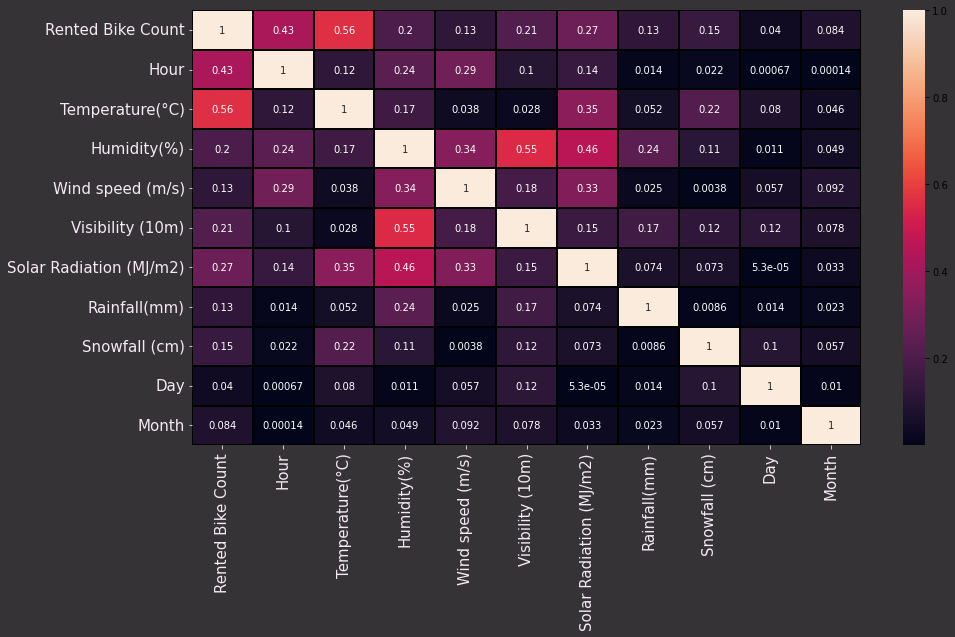

In [221]:
# Checking multicollinearity after defining the new column and removing the previous ones from our dataframe.
# Creating Heatmap to determine the co-relation
fig, ax = plt.subplots(figsize=(15,8),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.heatmap(abs(data.corr()),annot=True,linewidth=1,linecolor="black")
ax.tick_params( colors='#F5E9F5',labelsize=15) 
ax.tick_params( colors='#F5E9F5',labelsize=15)

* Heat map shows slightly postive relation of Rented bike count with Hour, Temperature,Dew point Temperature, Solar Radiaton

* Bike sharing count is negatively co-related to Humidity, Snowfall, Rainfall

* Temperature and Dew point temperature are positively co-related.

# Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


## Identify Inputs and Targets

While the dataset contains `18` columns, not all of them are useful for modeling. Note the following:

- The first column is `date` and isn't useful for training the model.
- The second column `Rented Bike Count` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

>Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [222]:
# Identify the input columns (a list of column names)
input_cols=list(data.columns)[1:]
# Identify the name of the target column 
target_cols=list(data.columns)[0]

In [223]:
# It always a good practice whatever code u execute, print and check it 
input_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Day',
 'Month']

In [224]:
# It always a good practice whatever code u execute, print and check it 
target_cols        

'Rented Bike Count'

>Make sure that the `Date` and `Rented Bike Count` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [225]:
# Separate input & target data
inputs_df = data[input_cols] 
targets = np.sqrt(data[target_cols])

In [105]:
# It always a good practice whatever code u execute, print and check it 
inputs_df.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


In [226]:
# It always a good practice whatever code u execute, print and check it 
targets

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8465, dtype: float64

##Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

>Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas).

In [227]:
# identifying Numerical and Categorical columns
numeric_cols = inputs_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols= inputs_df.select_dtypes(include=[object]).columns.tolist()

In [228]:
# It always a good practice whatever code u execute, print and check it 
numeric_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [229]:
# It always a good practice whatever code u execute, print and check it 
categorical_cols

['Seasons', 'Holiday', 'Functioning Day']

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [230]:
# using isna() to calculate the null values in Numeric columns
inputs_df[numeric_cols].describe().loc[['min','max']]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
min,0.0,-17.8,0.0,0.0,27.0,0.00,0.0,0.0,1.0,1.0
max,23.0,39.4,98.0,7.4,2000.0,3.52,35.0,8.8,31.0,12.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


>Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [235]:
# Create the scaler
scaler=StandardScaler()
# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])


After scaling, the ranges of all numeric columns should be (0, 1).

In [236]:
# using isna() to calculate the null values in Numeric columns
inputs_df[numeric_cols].describe().loc[['min','max']]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
min,-1.662748,-2.525770,-2.838716,-1.668777,-2.310079,-0.654079,-0.132495,-0.174951,-1.676356,-1.586225
max,1.660716,2.200074,1.945593,5.486373,0.929577,3.400314,30.965527,19.643216,1.724731,1.590079


##Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

In [237]:
# Printing unique Categorical columns 
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Seasons            4
Holiday            2
Functioning Day    1
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

>Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category

In [238]:
# 1. Create the encoder
encoder=OneHotEncoder(sparse=False, handle_unknown= "ignore")
# 2. Fit the encoder to thr categorical columns
encoder.fit(inputs_df[categorical_cols])
# 3. Generate column names for each category
encoded_cols= list(encoder.get_feature_names(categorical_cols))
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

The new one-hot category columns should now be added to `inputs_df`.

In [239]:
# Rename for better understanding 
input = inputs_df[numeric_cols + encoded_cols]
target = targets

##Feature Selection

In [243]:
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(input, target)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [244]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False])

In [245]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat = input.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((input.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 17
selected features: 14


In [246]:
# Display feature selected
selected_feat

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Day', 'Month', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Winter', 'Holiday_Holiday'],
      dtype='object')

In [247]:
# store the selected feature in input
input=input[selected_feat]

##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [248]:
# Import train_test_split from sklearn library to make split of data into train sets and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input,target,test_size=0.25,random_state=42)

In [249]:
# It always a good practice to print and check the executed codes.
train_inputs.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Winter,Holiday_Holiday
1164,0.071234,-0.848591,0.676287,0.651812,-1.934062,-0.654079,-0.132495,-0.174951,0.250926,-1.586225,0.0,0.0,1.0,0.0
4803,-1.229252,0.588991,0.529828,-0.315100,-0.418501,-0.654079,-0.132495,-0.174951,0.364296,-0.142450,0.0,0.0,0.0,0.0
1450,-0.217763,-1.674787,-0.788298,-0.798556,0.445188,-0.020580,-0.132495,-0.174951,1.611361,-1.586225,0.0,0.0,1.0,0.0
3881,0.793726,0.506371,-0.641839,0.845194,-0.574491,0.267374,-0.132495,-0.174951,-1.222878,1.301324,0.0,1.0,0.0,0.0
7447,-0.651259,0.126321,1.506218,-1.088630,-0.441489,-0.619525,-0.132495,-0.174951,-0.656030,0.146305,1.0,0.0,0.0,0.0


In [250]:
# It always a good practice to print and check the executed codes.
train_targets

1164    16.340135
4803    19.209373
1450    13.038405
3881    43.162484
7447    18.574176
          ...    
5782    37.496667
5239    23.811762
5438    28.670542
860     17.944358
7469    14.662878
Name: Rented Bike Count, Length: 6348, dtype: float64

In [251]:
# It always a good practice to print and check the executed codes.
val_inputs.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Winter,Holiday_Holiday
5993,0.793726,1.886119,-0.690659,0.651812,0.699698,1.292490,-0.132495,-0.174951,-0.882769,0.146305,0.0,0.0,0.0,0.0
5340,0.071234,1.266472,0.725106,0.361738,-0.177128,0.348001,-0.132495,-0.174951,-0.996139,1.301324,0.0,0.0,0.0,0.0
5951,1.660716,1.324305,1.018023,-0.411791,0.082307,-0.654079,-0.132495,-0.174951,-0.882769,-0.431205,0.0,0.0,0.0,0.0
879,0.504729,-0.865115,-1.520590,0.458429,0.727612,0.405592,-0.132495,-0.174951,-1.676356,-0.142450,0.0,0.0,1.0,0.0
6909,1.371719,0.985565,0.139272,-0.121718,0.929577,-0.654079,-0.132495,-0.174951,-0.202552,0.723815,1.0,0.0,0.0,0.0


In [252]:
# It always a good practice to print and check the executed codes.
val_targets

5993    35.099858
5340    31.048349
5951    30.692019
879     19.313208
6909    35.482390
          ...    
1079    12.000000
2272    26.795522
7555    40.174619
4945    24.186773
5240    28.844410
Name: Rented Bike Count, Length: 2117, dtype: float64

# Models

In [253]:
# List of models that we are going to use for this dataset
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ]

In [254]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name

    start = time.time()
    end = time.time()

    model.fit(train_inputs,train_targets)
    
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_R2_Score"] = metrics.r2_score(train_targets,model.predict(train_inputs))
    model_data_dic["Train_RMSE_Score"] = metrics.mean_squared_error(train_targets,model.predict(train_inputs),squared=False)
    # Validation set
    model_data_dic["Test_R2_Score"] = metrics.r2_score(val_targets,model.predict(val_inputs))
    model_data_dic["Test_RMSE_Score"] = metrics.mean_squared_error(val_targets,model.predict(val_inputs),squared=False)

    model_data.append(model_data_dic)

In [255]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Train_RMSE_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,1.192093e-06,0.613102,7.416166e+00,0.625594,7.132554
1,Lasso:,1.192093e-06,0.545983,8.033733e+00,0.554856,7.777210
2,Ridge:,1.668930e-06,0.613102,7.416167e+00,0.625598,7.132520
3,DecisionTree,1.668930e-06,1.000000,1.930823e-17,0.803552,5.166508
4,RandomForest,1.192093e-06,0.985075,1.456597e+00,0.891573,3.838331
5,GradientBoostingRegressor:,9.536743e-07,0.886332,4.019756e+00,0.873843,4.140269


As we can see clearly out of 12 models Lightgbm, ExtraTree and XGboost give as max R2 score and Less RMSE on test set. 

> create a function to calculate performence metrics 

In [256]:
# Custom Function for Performance Metrics
def evaluate_train(model, train_inputs,train_targets):
    # Prediction on Train inputs
    predictions = model.predict(train_inputs)
    print('Train_Data - Model Performance')
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(train_targets, predictions, squared=False))
    print('R^2:', metrics.r2_score(train_targets, predictions))


def evaluate_val(model, val_inputs,val_targets):
    # Prediction on val inputs
    predictions = model.predict(val_inputs)
    print('Validation_data - Model Performance')
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(val_targets, predictions, squared=False))
    print('R^2:', metrics.r2_score(val_targets, predictions))   


# Model-1 Random Forest

>Training

In [257]:
from sklearn.ensemble import RandomForestRegressor
# Create the model
base_model = RandomForestRegressor()
# Fit the model
base_model.fit(train_inputs,train_targets)

RandomForestRegressor()

> Evaluate

In [258]:
# Call evaluate_train function that we train above
evaluate_train(base_model, train_inputs,train_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 1.4702952639768831
R^2: 0.9847928861171527


In [259]:
# Call evaluate_val function that we train above
evaluate_val(base_model, val_inputs,val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 3.860062790754727
R^2: 0.8903417038997746


## Hyperparameter Tuning

Just like decision trees and random forests, Extra Tres
 also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 



In [261]:
# GridSearchCV to find best parameters
from sklearn.model_selection import GridSearchCV
param_grid_cv = {'bootstrap': [False],
              'max_depth': [70, 80],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2],
              'n_estimators': [1000]}

Grid_Search = GridSearchCV(estimator = base_model, param_grid = param_grid_cv, cv = 5)

# Fitting the training data into the model.
Grid_Search.fit(train_inputs,train_targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [70, 80],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2], 'n_estimators': [1000]})

In [262]:
# We can view the best parameters 
Grid_Search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [263]:
best_grid = Grid_Search.best_estimator_
final_model = evaluate_val(best_grid, val_inputs, val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 3.686810224930643
R^2: 0.8999644598730984


In [265]:
# base model
base_model = RandomForestRegressor(n_jobs=-1, random_state=42)
base_model.fit(train_inputs, train_targets)
base_accuracy = evaluate_train(base_model, val_inputs, val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 3.838331086402258
R^2: 0.8915729551096677


In [266]:
print('Improvement of {:0.2f}%.'.format( 100 * (0.8999 - 0.8915) / 0.8915))

Improvement of 0.94%.


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

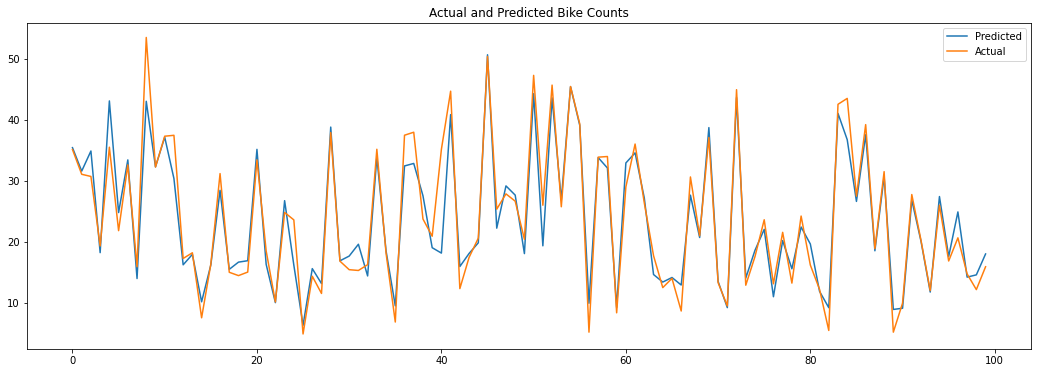

In [276]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((best_grid.predict(val_inputs))[:100])
plt.plot((np.array(val_targets)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Actual Bike Rented Count')

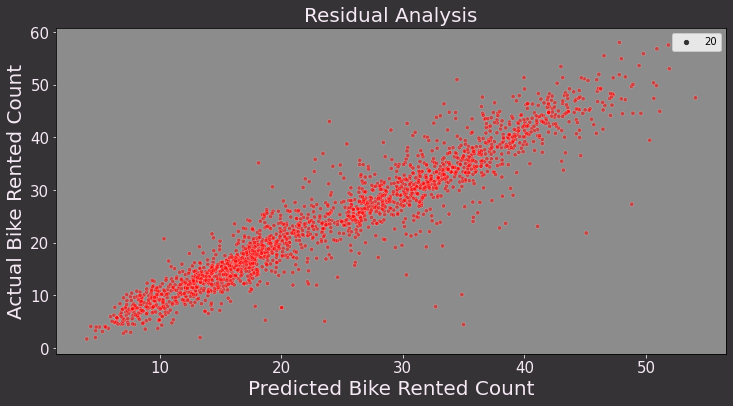

In [277]:
# Visualizing the predicated vs Actual test values
predictions = best_grid.predict(val_inputs)
fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.scatterplot(predictions,val_targets,size = 20, alpha = 0.5,color= "red")
ax.set_title('Residual Analysis',color='#F5E9F5', fontsize = 20)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel('Predicted Bike Rented Count', color='#F5E9F5', fontsize=20)
ax.set_ylabel('Actual Bike Rented Count',  color='#F5E9F5', fontsize=20)


Feature Importance
Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [269]:
# Important features or coefficient of the model
best_grid.feature_importances_

array([0.24287615, 0.22704299, 0.10316966, 0.03127072, 0.04091596,
       0.07300515, 0.06210922, 0.00636604, 0.04330149, 0.0344076 ,
       0.01336457, 0.00826965, 0.11021512, 0.00368569])

In [270]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': best_grid.feature_importances_
}).sort_values('importance', ascending=False)

Text(0.5, 1.0, 'Feature Importance')

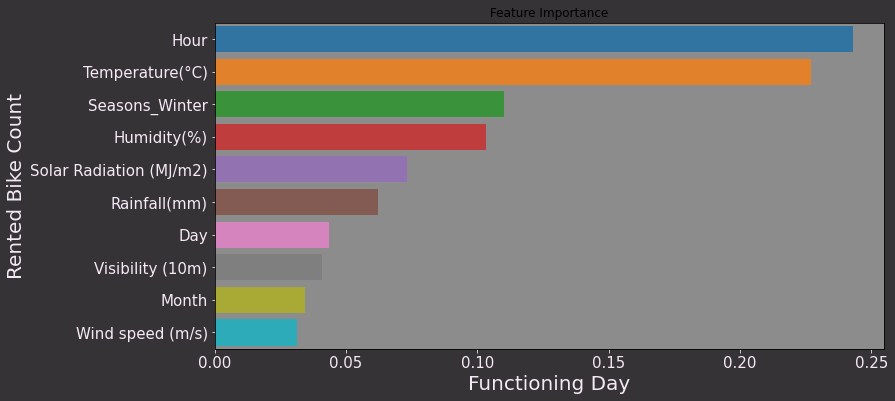

In [271]:
# Visualize the Feature Importance on bar plot
fig, ax = plt.subplots(figsize=(12,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
ax.set_ylabel("Rented Bike Count",  color='#F5E9F5', fontsize=20)

plt.title('Feature Importance')


# Model 2 - Gradient Boost Regressor
Gradient boosting gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

In [272]:
# Importing library
from sklearn.ensemble import GradientBoostingRegressor
g_boost = GradientBoostingRegressor(random_state=4)
# Fit the model
g_boost.fit(train_inputs,train_targets)

GradientBoostingRegressor(random_state=4)

In [273]:
# Training set
evaluate_train(g_boost,train_inputs,train_targets)

# Validation set
evaluate_val(g_boost,val_inputs,val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 4.0197564543843365
R^2: 0.8863322759966963
Validation_data - Model Performance
Root Mean Squared Error (RMSE): 4.140269003777434
R^2: 0.8738434298166654


#**Conclusion**

**Comparision of RMSE values for Test Data as lower the RMSE
better the model performance**

LinearRegressor RMSE: 7.132

Ridge Regression RMSE: 7.134

Lasso Regression RMSE: 7.777


DecisionTreeRegressor RMSE: 5.166

RandomForestRegressor RMSE: 3.833

GradientBoostingRegressor RMSE: 4.140

* Most numbers of Bikes were rented in Summer, followed by Autumn, Spring, and Winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.

* Majority of the client in the bike rental sector belongs to the Working class. This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.

* Temperature of 20-30 Degrees, evening time 4 pm- 8 pm,Humidity between 40%-60% are the most favorable parameters where the Bike demand is at its peak.

* Temperature, Hour of the day, Solar radiation, and Humidity are major driving factors for the Bike rent demand.

* Feature and Labels had a weak linear relationship, hence the prediction from the linear model was very low. Best predictions are obtained with a RandomForest model with an R2 Score of 0.899 and RMSE of 3.63 .